# Is there a relationship between property cost and how much people party in NYC

First, let's look at property prices by borough

In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

sales_df = pd.read_csv("nyc-rolling-sales.csv")
sales_df.head(5)


ModuleNotFoundError: No module named 'seaborn'

In [16]:
sales_df = sales_df.rename(columns={'SALE PRICE': 'SALEPRICE'})
sales_df = sales_df[sales_df.SALEPRICE != ' -  ']
sales_df['SALEPRICE'].value_counts().head(10)

0         10228
10          766
450000      427
550000      416
650000      414
600000      409
700000      382
400000      378
750000      377
300000      351
Name: SALEPRICE, dtype: int64

### Zero values aren't helpful so let's drop them

In [19]:
sales_df = sales_df[sales_df.SALEPRICE != '0']
sales_df = sales_df[sales_df.SALEPRICE != '10']
sales_df = sales_df[sales_df.SALEPRICE != '1']
sales_df['SALEPRICE'].value_counts()

450000     427
550000     416
650000     414
600000     409
700000     382
          ... 
461100       1
901469       1
1974000      1
2822700      1
787107       1
Name: SALEPRICE, Length: 10004, dtype: int64

In [26]:
# need these values to be numeric
sales_df['SALEPRICE'] = pd.to_numeric(sales_df['SALEPRICE'])
prices = sales_df['SALEPRICE']
prices.value_counts()

450000     427
550000     416
650000     414
600000     409
700000     382
          ... 
2064706      1
643400       1
188750       1
856400       1
724994       1
Name: SALEPRICE, Length: 10004, dtype: int64

In [27]:
prices.std()


12422042.14610187

In [24]:
prices.var()

154307131079531.12

### The boroughs as ints isn't very informative for this example

In [28]:
sales_df['BOROUGH'][sales_df['BOROUGH'] == 1] = 'Manhattan'
sales_df['BOROUGH'][sales_df['BOROUGH'] == 2] = 'Bronx'
sales_df['BOROUGH'][sales_df['BOROUGH'] == 3] = 'Brooklyn'
sales_df['BOROUGH'][sales_df['BOROUGH'] == 4] = 'Queens'
sales_df['BOROUGH'][sales_df['BOROUGH'] == 5] = 'Staten Island'

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doi

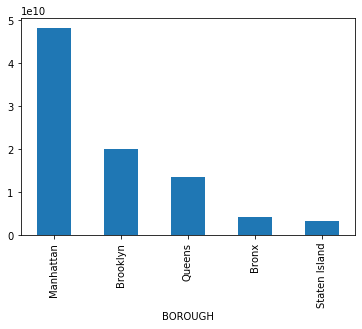

In [43]:
# visualize prices per borough
prices_and_borough = sales_df[['BOROUGH', 'SALEPRICE']]
cost_per_borough = prices_and_borough.groupby('BOROUGH').SALEPRICE.sum().sort_values(ascending=False)

cost_per_borough.plot(kind='bar')

In [3]:
df = pd.read_csv("party_in_nyc.csv")
df.head(10)

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516
5,2015-12-31 00:08:05,2015-12-31 01:59:12,Residential Building/House,10467.0,BRONX,BRONX,40.858748,-73.865625
6,2015-12-31 00:11:40,2015-12-31 06:24:00,Residential Building/House,11230.0,BROOKLYN,BROOKLYN,40.617005,-73.956920
7,2015-12-31 00:12:13,2015-12-31 00:38:09,Residential Building/House,11215.0,BROOKLYN,BROOKLYN,40.665051,-73.981278
8,2015-12-31 00:12:37,2015-12-31 05:03:39,Residential Building/House,10463.0,BRONX,BRONX,40.875895,-73.912471
9,2015-12-31 00:14:13,2015-12-31 06:25:40,Store/Commercial,11372.0,JACKSON HEIGHTS,QUEENS,40.755584,-73.885201


In [6]:
party_per_borough = df['Borough'].value_counts()
party_per_borough

BROOKLYN         68905
MANHATTAN        64172
BRONX            47672
QUEENS           38274
STATEN ISLAND     5411
Unspecified        980
Name: Borough, dtype: int64

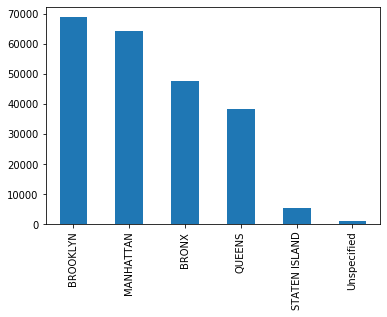

In [7]:
party_per_borough.plot(kind='bar')

### next will combine charts and attempt to find correlation 